# **[Project] Cancer Subtype Classification**

# Introduction

The [TCGA Kidney Cancers Dataset](https://archive.ics.uci.edu/dataset/892/tcga+kidney+cancers) is a bulk RNA-seq dataset that contains transcriptome profiles (i.e., gene expression quantification data) of patients diagnosed with three different subtypes of kidney cancers.
This dataset can be used to make predictions about the specific subtype of kidney cancers given the normalized transcriptome profile data.

The normalized transcriptome profile data is given as **TPM** and **FPKM** for each gene.

> TPM (Transcripts Per Million) and FPKM (Fragments Per Kilobase Million) are two common methods for quantifying gene expression in RNA sequencing data.
> They both aim to account for the differences in sequencing depth and transcript length when estimating gene expression levels.
>
> **TPM** (Transcripts Per Million):
> - TPM is a measure of gene expression that normalizes for both library size (sequencing depth) and transcript length.
> - The main idea behind TPM is to express the abundance of a transcript relative to the total number of transcripts in a sample, scaled to one million.
>
> **FPKM** (Fragments Per Kilobase Million):
> - FPKM is another method for quantifying gene expression, which is commonly used in older RNA-seq analysis pipelines. It's similar in concept to TPM but differs in the way it's calculated.
> - FPKM also normalizes for library size and transcript length, but it measures gene expression as the number of fragments (i.e., reads) per kilobase of exon model per million reads.
>
> TPM is generally considered more robust to variations in library size, making it a preferred choice in many modern RNA-seq analysis workflows.

We provide one dataset for each kidney cancer subtype:

- [TCGA-KICH](https://portal.gdc.cancer.gov/projects/TCGA-KICH): kidney chromophobe (renal clear cell carcinoma)
- [TCGA-KIRC](https://portal.gdc.cancer.gov/projects/TCGA-KIRC): kidney renal clear cell carcinoma
- [TCGA-KIRP](https://portal.gdc.cancer.gov/projects/TCGA-KIRP): kidney renal papillary cell carcinoma

> This and _much_ more data is openly available on the [NCI Genomic Data Commons (GDC) Data Portal](https://portal.gdc.cancer.gov/).

# Data access

There are two ways to access the data: via the TNT homepage or the GDC Data Portal.

## Download from the TNT homepage (_recommended_)

The download from the TNT homepage is straightforward:

In [1]:
# ! wget http://www.tnt.uni-hannover.de/edu/vorlesungen/AMLG/data/project-cancer-classification.tar.gz
# ! tar -xzvf project-cancer-classification.tar.gz
# ! mv -v project-cancer-classification/ data/
# ! rm -v project-cancer-classification.tar.gz

In the `data/` folder you will now find many files in the [TSV format](https://en.wikipedia.org/wiki/Tab-separated_values) ([CSV](https://en.wikipedia.org/wiki/Comma-separated_values)-like with tabs as delimiter) containing the normalized transcriptome profile data.

To start, you can read a TSV file into a [pandas](https://pandas.pydata.org) [`DataFrame`](pandas dataframe to dict) using the [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) function with the `sep` parameter set to `\t`:

In [2]:
import pandas as pd

tsv_file_path = "data/tcga-kich-geq/0ba21ef5-0829-422e-a674-d3817498c333/4868e8fc-e045-475a-a81d-ef43eabb7066.rna_seq.augmented_star_gene_counts.tsv"

# Read the TSV file into a DataFrame
df = pd.read_csv(filepath_or_buffer=tsv_file_path, sep="\t", header=1)

# Display the first few rows of the DataFrame
print("Shape:", df.shape)
print("Column names:", df.columns)

# df.rename({"tpm_unstranded": "uwu"}, axis=1, inplace=True)

print(df.head(n=10))

Shape: (60664, 9)
Column names: Index(['gene_id', 'gene_name', 'gene_type', 'unstranded', 'stranded_first',
       'stranded_second', 'tpm_unstranded', 'fpkm_unstranded',
       'fpkm_uq_unstranded'],
      dtype='object')
              gene_id gene_name       gene_type  unstranded  stranded_first  \
0          N_unmapped       NaN             NaN     3443841         3443841   
1      N_multimapping       NaN             NaN     8132931         8132931   
2         N_noFeature       NaN             NaN     2585961        33629273   
3         N_ambiguous       NaN             NaN     6916406         1874948   
4  ENSG00000000003.15    TSPAN6  protein_coding        3085            1533   
5   ENSG00000000005.6      TNMD  protein_coding           0               0   
6  ENSG00000000419.13      DPM1  protein_coding        1896             968   
7  ENSG00000000457.14     SCYL3  protein_coding         493             373   
8  ENSG00000000460.17  C1orf112  protein_coding         107       

## Download from the GDC Data Portal

The data can also be accessed via the GDC Data Portal.

A convenient way to download multiple files from the GDC Data Portal is to use a manifest file generated by the portal.
After generating a manifest file, initiate the download using the [GDC Data Transfer Tool](https://gdc.cancer.gov/access-data/gdc-data-transfer-tool) by supplying the `-m` or `--manifest` option, followed by the location and name of the manifest file.

We provide the following manifest files (in the `gdc-data-portal` folder) for the datasets:

- `gdc_manifest.tcga-kich-geq.txt` (91 files)
- `gdc_manifest.tcga-kirc-geq.txt` (614 files)
- `gdc_manifest.tcga-kirp-geq.txt` (323 files)

> We also provide `metadata.*.json` files containing extensive dataset metadata.

Assuming that the GDC Data Transfer Tool is available as `gdc-client`, the following commands can be used to download the data.

```shell
mkdir --parents data/tcga-kich-geq/
mkdir --parents data/tcga-kirc-geq/
mkdir --parents data/tcga-kirp-geq/

gdc-client download --manifest gdc_manifest.tcga-kich-geq.txt --dir data/tcga-kich-geq/
gdc-client download --manifest gdc_manifest.tcga-kirc-geq.txt --dir data/tcga-kirc-geq/
gdc-client download --manifest gdc_manifest.tcga-kirp-geq.txt --dir data/tcga-kirp-geq/
```

In [3]:
#############################################
# Ideas to explore:
# Implement import functionality, that imports all of the files containing transcriptome profile data into data frames
# Do files all have the same format regarding genes and rows? -> yes
# Can u have three dimensional data frames? Is that getting too big?
# Convert data so that in a row is one profile, where the columns are tpm per gene ID?
# Try out PCA on this data
# Try out KNN on data directly? on reduced data?
# Try out Random Forest?
# In papers they often mention Graph-CNNs or just CNNs

In [4]:
from os import listdir
from os.path import join, isdir
import pandas as pd
from ipywidgets import IntProgress
from IPython.display import display

def read_files(base_path, class_names, column):    
    data = None
    classes = []
    
    for c in class_names:
        path = join(base_path, c)
        
        print(path)
        f = IntProgress(min=0, max=len(listdir(path))) # for progress display
        display(f)
        
        for subfolder in listdir(path):
            f.value += 1
            subpath = join(path, subfolder)            
            if isdir(subpath):
                # print(subfolder)
                for file in listdir(subpath):
                    if file.endswith(".tsv"):
                        tsv_file_path = join(subpath, file)
                        # print(tsv_file_path)        
                        df = pd.read_csv(filepath_or_buffer=tsv_file_path, sep="\t", header=1)
                        if data is None:
                            data = df.iloc[:, :3]
                        df.rename({column: subfolder}, axis=1, inplace=True)
                        col = df.loc[:, subfolder]
                        data = pd.concat([data, col], axis=1)
                        classes.append(c)
    
    return data, pd.DataFrame(classes).T

# class_names = ["tcga-kich-geq", "tcga-kirc-geq", "tcga-kirp-geq"] # kidney chromophobe, kidney renal clear cell carcinoma, kidney renal papillary cell carcinoma
# data_type = "tpm_unstranded"
# base_data = None
# base_data, classes = read_files("data/", class_names, data_type)
# data = base_data.copy()
# data.drop([0, 1, 2, 3], inplace=True)

In [5]:
import pickle


# Load data and labels
with open("data_and_labels.pkl", "rb") as f:
    data, classes = pickle.load(f)

In [6]:
# Only select genes that code proteins
data = data.loc[(data['gene_type'] == "protein_coding")]

# Afterwards drop unnecessary columns
data.drop(["gene_id", "gene_name", "gene_type"], 
          axis=1, inplace=True)

In [7]:
# Only consider genes, that have a tpm greater 5 in at least 50% of samples
df_bool = (data > 5)
data = data.loc[(df_bool.sum(axis=1) / len(df_bool.columns) > 0.5)]

In [8]:
# Variance threshold filter. could use static val from data inspection, fraction of standard deviation or quantil value of variances e.g. smallest 10% of variance gets filtered
var = data.var(axis=1)
data = data.loc[var > 10]

In [9]:
X = data.T.to_numpy()

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
     precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


def report_prec_recall_f1(true_y, predicted_y, classes, classnames):
    precision = precision_score(true_y, predicted_y, average=None,
                                labels=classes)
    recall = recall_score(true_y, predicted_y, average=None,
                          labels=classes)
    f1 = f1_score(true_y, predicted_y, average=None, labels=classes)
    # print("%15s%10s%10s%10s" % ("Class", "Precision", "Recall", "F1 score"))
    # for t in zip(classnames, precision, recall, f1):
    #     print("%15s%10.3f%10.3f%10.3f" % t)
    return precision, recall, f1


def eval_random_forest(X_train, y_train, X_test, y_test, plot=False):
    # Train and Evaluate
    # n_estimators is the number of trees. Set verbose to a smaller number if it is too verbose.
    clf = RandomForestClassifier(n_estimators=16, 
                                 criterion="entropy", 
                                 n_jobs=-1)
    clf.fit(X_train, y_train)

    class_names = ["tcga-kich-geq", "tcga-kirc-geq", "tcga-kirp-geq"] # kidney chromophobe, kidney renal clear cell carcinoma, kidney renal papillary cell carcinoma
    y_pred = clf.predict(X_test)
    if plot:
        cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot()
    precision, recall, f1 = report_prec_recall_f1(y_test, 
                          y_pred, 
                          clf.classes_, 
                          class_names)
    return np.array((precision, recall, f1)).T


def disp_results(**kwargs):
    for key, value in kwargs.items():
        res = pd.DataFrame(value, 
                           index=['tcga-kich-geq', 'tcga-kirc-geq', 'tcga-kirp-geq'], 
                           columns=['Precision', 'Recall', 'F1 score'])
        print(f"\n{key}")
        print(res)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

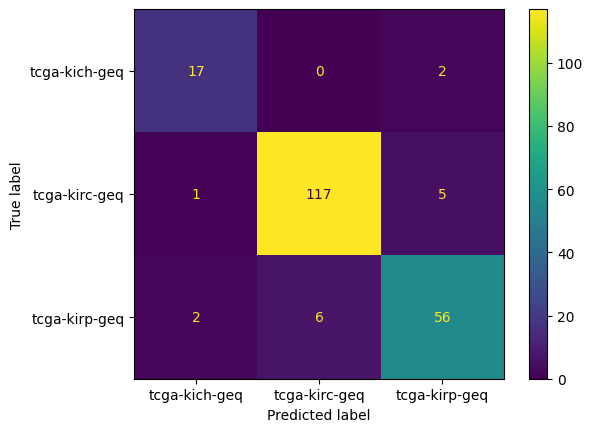

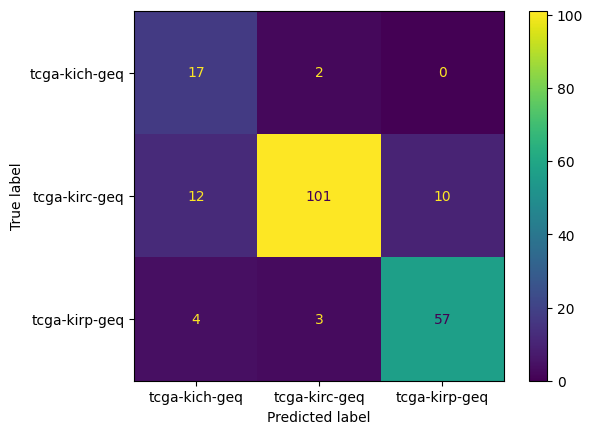

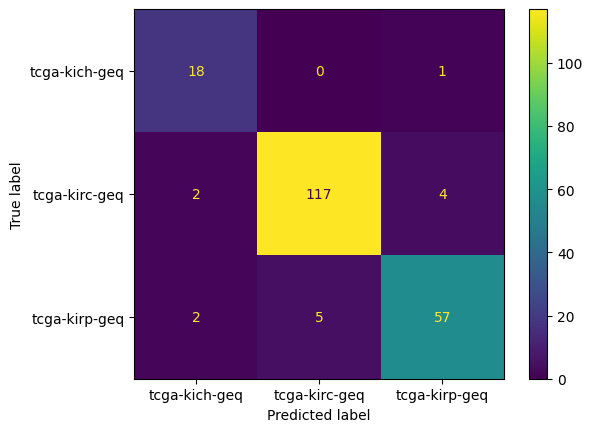

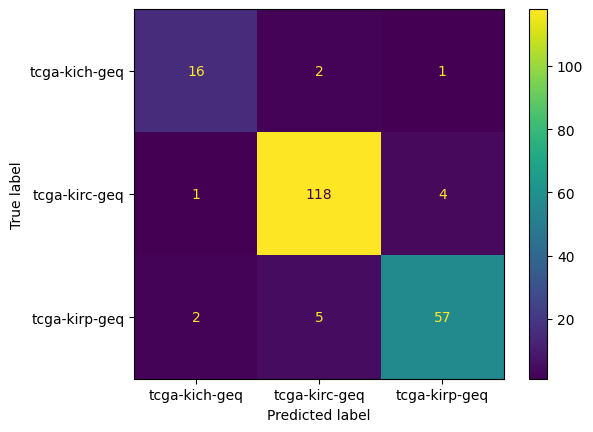

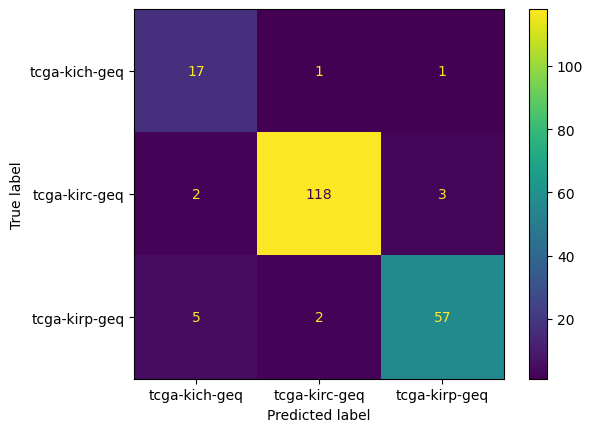

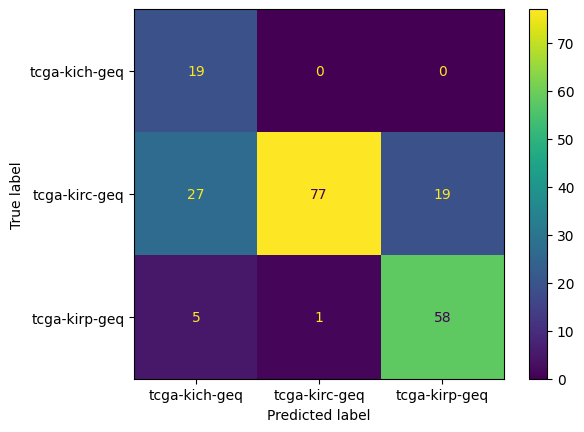

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X=X)
y = classes

# Split into training and test: 20% test size. Use different random states for each epoch with cross validation.
iterations = 100
base_results = np.zeros((3, 3))
rus_results = np.zeros((3, 3))
ros_results = np.zeros((3, 3))
tl_results = np.zeros((3, 3))
smote_results = np.zeros((3, 3))
nm_results = np.zeros((3, 3))

for iter in range(iterations):
    print("Iteration: ", iter)
    random_state = 40 + iter
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    if iter == iterations-1:
        print_confusion_matrix = True
    else:
        print_confusion_matrix = False

    ### Use different methods to oversample or undersample the data
    # Random Under Sampling
    rus = RandomUnderSampler(random_state=random_state, 
                             replacement=True) # fit predictor and target variable
    
    # Random Over Sampling
    ros = RandomOverSampler(random_state=random_state)
    
    # Tomek Links
    tl = TomekLinks(sampling_strategy='majority')
    
    # SMOTE
    smote = SMOTE()
    
    # NearMiss
    nm = NearMiss()
    
    ### Resample the data using the above-mentioned methods
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
    
    X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
    
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)
    
    ### Evaluate the Random Forest Classifier
    # Base
    base_result = eval_random_forest(X_train, 
                                              y_train, 
                                              X_test, 
                                              y_test, 
                                              print_confusion_matrix)
    base_results += base_result
    
    # Random Under Sampling
    rus_result = eval_random_forest(X_train_rus, 
                                    y_train_rus, 
                                    X_test, 
                                    y_test, 
                                    print_confusion_matrix)
    rus_results += rus_result
    
    # Random Over Sampling
    ros_result = eval_random_forest(X_train_ros, 
                                    y_train_ros,
                                    X_test, 
                                    y_test, 
                                    print_confusion_matrix)
    ros_results += ros_result
    
    # Tomek Links
    tl_result = eval_random_forest(X_train_tl, 
                                   y_train_tl, 
                                   X_test, 
                                   y_test, 
                                   print_confusion_matrix)
    tl_results += tl_result
    
    # SMOTE
    smote_result = eval_random_forest(X_train_smote, 
                                      y_train_smote, 
                                      X_test, 
                                      y_test, 
                                      print_confusion_matrix)
    smote_results += smote_result
    
    # NearMiss
    nm_result = eval_random_forest(X_train_nm, 
                                   y_train_nm, 
                                   X_test, 
                                   y_test, 
                                   print_confusion_matrix)
    nm_results += nm_result
    
base_results /= iterations
rus_results /= iterations
ros_results /= iterations
tl_results /= iterations
smote_results /= iterations
nm_results /= iterations

disp_results(Base=base_results, 
             RandomUnderSampling=rus_results, 
             RandomOverSampling=ros_results, 
             TomekLinks=tl_results, 
             Smote=smote_results, 
             NearMiss=nm_results)
